<a href="https://colab.research.google.com/github/victor-bastos/DataScienceIntroduction/blob/main/FinalExam/Exame_CMC_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CMC-13 Exame**: Predição de preços de casas do Reino Unido


Victor Hugo de Oliveira Bastos

>[1 - Preparação dos dados](#scrollTo=PVReDV-SVMVX)

>>[Importando pacotes e dados](#scrollTo=efpR3GuWVMVc)

>>[Primeira análise](#scrollTo=LHNzVtsrY7AG)

>>[Engenharia do Zip code](#scrollTo=mmMbSCctWNjA)

>>[Redução das dimensões](#scrollTo=L1ZjYu5SXhVu)

>>[Usando o Fuzzy Matching](#scrollTo=LnFaBlbuYCJx)

>>>[Excluindo features não desejadas](#scrollTo=AWN0llUi2-Ro)

>>[2 - Auto EDA](#scrollTo=tmeha_0Uz_lL)

>>[Lidando com outliers](#scrollTo=2s18PM6bg4Cg)

>>[Rare labels](#scrollTo=awkJFs_K9ftf)

>>[Categorical encoding](#scrollTo=0CDVYN5E_P0V)

>>[Escalas nas variáveis](#scrollTo=794vAwqhm9ee)

>>[Preenchendo valores nulos](#scrollTo=qRLSDbqYty9e)

>>[Transformações de variáveis](#scrollTo=_-JkpeoiF71v)

>>[Discretização de variáveis](#scrollTo=itDN2uYXfKqP)

>[3 - Aplicando os modelos](#scrollTo=jrQrwD-TxATK)

>[4 - Análise Comparativa do desempenho dos modelos.](#scrollTo=KDAaqof1K7-5)

>>[Visualizando resultados](#scrollTo=71xjhG8qAEjX)

>>[Importância das features](#scrollTo=Oxdz0bbYF0_N)

>[Conclusão](#scrollTo=Bzs3V9bRu1S0)

>[5 - Aplicação da predição do Modelo Desenvolvido](#scrollTo=amSZ9khIKvH2)



<a name='prep'></a>
# 1 - Preparação dos dados



<a name='imp'></a>
## Importando pacotes e dados

In [ ]:
# Importing the necessary Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing scipy.stats for Q-Q plots
import scipy.stats as stats
plt.style.use('ggplot')

# Importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Importing OrdinalEncoder from sklearn.compose and sklearn.preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# Importing KBinsDiscretizer from sklearn.preprocessing
from sklearn.preprocessing import KBinsDiscretizer

# Importing MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Importing KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Importing DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Importing GaussianNB from sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB

# Importing metrics from sklearn.metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
    roc_curve,
    roc_auc_score
)

# Importing GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

# Importing PowerTransformer and FunctionTransformer from sklearn.preprocessing
from sklearn.preprocessing import PowerTransformer, FunctionTransformer

# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


MessageError: ignored

In [ ]:
!pip install feature_engine

!pip install rapidfuzz

!pip install pandas_profiling

from rapidfuzz import fuzz, process

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e8f116c73c2352450d85f8e3d18aea5af89d1ade549de0df38cc7e54d12df24c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6f

Por conveniência, optou-se por adquirir os dados a partir da leitura do Google Drive.

In [ ]:
# Carregando os dados...

# Definindo o caminho onde os arquivos estão armazenados
path_files = "/content/drive/MyDrive/Colab Notebooks/Labs_CMC-13/Exame"

# URL do arquivo CSV
#url_data = 'https://drive.google.com/file/d/1XeDc_rL2iTN7tsB2F3M1DkDFfK5bEaAP/view?usp=sharing'
url_data = 'https://drive.google.com/file/d/1EF1IKSiD5IcPW4KodJlz-YSnF2fJh55H/view?usp=sharing'
url_postal_codes = 'https://drive.google.com/file/d/1o5QmnltrYqY4weBS-zIG4ZFHGC1J2aUF/view?usp=sharing'
url_codelist = 'https://drive.google.com/file/d/1kzRwAsb01Xu-vpO5iCSHgjdPbMGzpGW9/view?usp=sharing'


# Extração do identificador do arquivo da URL
file_id = url_data.split('/')[-2]
postal_codes = url_postal_codes.split('/')[-2]
codelist = url_codelist.split('/')[-2]

# Construção do link de download direto do arquivo
url_download = 'https://drive.google.com/uc?id=' + file_id
url_download_postal_codes = 'https://drive.google.com/uc?id=' + postal_codes
url_download_codelist = 'https://drive.google.com/uc?id=' + codelist

# Leitura do arquivo CSV e criação do DataFrame
full_data = pd.read_csv(url_download, on_bad_lines='skip', sep=',')
postcode_db = pd.read_csv(url_download_postal_codes, on_bad_lines='skip', sep=',')
codebook = pd.read_csv(url_download_codelist, on_bad_lines='skip', sep=',')

<a name='ana'></a>
## Primeira análise

In [ ]:
postcode_db

Postcode Admin_county_code Admin_district_code Admin_ward_code
0        AB101AB               NaN           S12000033       S13002842
1        AB101AF               NaN           S12000033       S13002842
2        AB101AG               NaN           S12000033       S13002842
3        AB101AH               NaN           S12000033       S13002842
4        AB101AL               NaN           S12000033       S13002842
...          ...               ...                 ...             ...
1719480  ZE3 9JU               NaN           S12000027       S13002776
1719481  ZE3 9JW               NaN           S12000027       S13002776
1719482  ZE3 9JX               NaN           S12000027       S13002776
1719483  ZE3 9JY               NaN           S12000027       S13002776
1719484  ZE3 9JZ               NaN           S12000027       S13002776

[1719485 rows x 4 columns]

Primeiramente, analisa-se o aspecto geral do *dataset*, visualizando todas as colunas e os tipos de dados presentes.

In [ ]:
df = full_data
df.head()

Unnamed: 0.1  Unnamed: 0    Price     Location Postal Code  Area  Bedrooms  \
0             0           0  1675000    Wimbledon    SW19 8NY  2716         5   
1             1           1   650000  Clerkenwell    EC1V 3PA   814         2   
2             2           2   735000       Putney    SW15 1QL   761         2   
3             3           3  1765000       Putney    SW15 1LP  1986         4   
4             4           4   675000       Putney    SW15 1PL   700         2   

   Bathrooms  Receptions City-County        House-Type  
0          5           5      London             House  
1          2           2      London  Flat / Apartment  
2          2           2      London  Flat / Apartment  
3          4           4      London             House  
4          2           2      London  Flat / Apartment

A fim de visualizar o quão repetitivo são os dados, analisa-se a quantidade de valores únicos por coluna.

In [ ]:
df.nunique()

Unnamed: 0.1    2958
Unnamed: 0      2958
Price            470
Location         573
Postal Code     2487
Area            1808
Bedrooms          11
Bathrooms         11
Receptions        11
City-County       51
House-Type         8
dtype: int64

Com base nesse resultado, nota-se que a coluna "id" não traz informação relevante a respeito da classificação das aves. As demais colunas são numéricas e contínuas, portanto, podem ser utilizadas no algoritmo de classificação.







<a name='zip'></a>
## Engenharia do Zip code

Neste projeto, buscamos aprimorar a nossa base de dados relacionada a um problema específico, utilizando informações externas do Reino Unido. Para isso, foram coletados dados abertos que relacionam todos os códigos postais possíveis com seus respectivos condados e localidades.

Ao incorporar esses dados externos em nossa base de dados existente, esperamos enriquecer as informações disponíveis e obter benefícios significativos para o nosso problema em questão. A inclusão dessas informações adicionais pode nos proporcionar uma visão mais detalhada e abrangente das localidades em relação aos códigos postais e condados correspondentes.

Ao considerar os dados do Reino Unido, é importante ressaltar que eles foram obtidos de fontes confiáveis e atualizadas. Dessa forma, podemos ter confiança na integridade e precisão dessas informações, o que contribuirá para uma análise e interpretação mais precisas dos dados.

Ao enriquecer a base de dados com os códigos postais, condados e localidades correspondentes, teremos a oportunidade de realizar análises mais profundas e abrangentes do nosso problema em questão. Além disso, essa expansão da base de dados pode abrir portas para a identificação de novos padrões, insights e relações relevantes para a resolução do problema.

Assim, ao incluir dados externos do Reino Unido que relacionam todos os códigos postais possíveis com os condados e localidades correspondentes, estamos enriquecendo a nossa base de dados existente e fortalecendo as análises e interpretações que podemos fazer. Essa iniciativa nos permitirá obter um conhecimento mais abrangente e detalhado do contexto relacionado ao problema em questão, abrindo caminho para soluções mais eficazes e informadas.

In [ ]:
# Substituir cada código GSS no banco de dados de CEP por nomes legíveis
for col in postcode_db.columns[1:]:
    # Aplicar a função lambda em cada valor da coluna
    # Usar o dicionário 'codebook' para obter o nome legível correspondente ao código GSS
    # Se o código não estiver no dicionário, manter o valor original
    postcode_db[col] = postcode_db[col].apply(lambda x: codebook.get(x, x))

# Amostrar 10 linhas aleatórias do banco de dados de CEP
postcode_db.sample(10)

Postcode Admin_county_code Admin_district_code Admin_ward_code
1305826  SA183ES               NaN           W06000010       W05000458
1521368  TN1 2DL         E10000016           E07000116       E05005144
164928   BR6 0XB               NaN           E09000006       E05000122
62315    B91 2JZ               NaN           E08000029       E05001295
1215812  RG1 6DB               NaN           E06000038       E05002326
321358   CV3 1PR               NaN           E08000026       E05001226
110006   BD6 1SD               NaN           E08000032       E05001367
1172162  PL311EY               NaN           E06000052       E05013274
736620   KW147LZ               NaN           S12000017       S13002991
676089   IG1 3SE               NaN           E09000026       E05011241

<a name='red'></a>
## Redução das dimensões

In [ ]:
# Para otimizar as operações subsequentes, inclua apenas os códigos postais
# que começam com as mesmas letras iniciais encontradas no conjunto de dados de listagem de imóveis.

property_postcode = full_data['Postal Code']

# Obtém as letras iniciais únicas dos códigos postais dos imóveis
starting_letters = property_postcode.apply(lambda x: x[0]).unique()

# Filtra os códigos postais válidos do banco de dados de CEP
valid_os_postcode = postcode_db['Postcode']
valid_os_postcode = valid_os_postcode[valid_os_postcode.apply(lambda x: x[0]).isin(starting_letters)]

valid_os_postcode

24954      B1  1AY
24955      B1  1BA
24956      B1  1BB
24957      B1  1BD
24958      B1  1BE
            ...   
1700035    WV992GZ
1700036    WV992HA
1700037    WV992HB
1700038    WV992HD
1700039    WV992ND
Name: Postcode, Length: 1159923, dtype: object

Assim, excluímos mais de 600k linhas

In [ ]:
# Vamos verificar se todos os códigos postais no conjunto de dados de listagem de imóveis de Londres fornecido
# estão corretos (existem no banco de dados Ordnance Survey)

# Verifica se os códigos postais dos imóveis estão incorretos (não estão na lista de códigos postais válidos)
property_postcode_wrong = ~property_postcode.isin(valid_os_postcode)

# Retorna os códigos postais incorretos
property_postcode[property_postcode_wrong]

0       SW19 8NY
1       EC1V 3PA
2       SW15 1QL
3       SW15 1LP
4       SW15 1PL
          ...   
2949    SW1V 3AE
2951    EC1R 4UL
2953      W4 3UR
2955    SE17 2JX
2957    SW18 3NY
Name: Postal Code, Length: 1965, dtype: object

<a name='fuzzy'></a>
## Usando o Fuzzy Matching

Antes, vamos testar para ver a correspondência que aparece quando há um espaço

In [ ]:
import time
from rapidfuzz import fuzz, process

start_time = time.time()

# Vamos direto para a correspondência aproximada (fuzzy matching)
# Vamos encontrar a melhor correspondência para o código postal 'B128NY' no banco de dados de CEP.

# Usamos o método 'extractOne' do pacote 'fuzzywuzzy' para encontrar a melhor correspondência.
# Definimos um limite de pontuação de 85 (score_cutoff = 85) para considerar uma correspondência válida.
# O argumento 'processor' é definido como 'None' e o 'scorer' como 'fuzz.ratio' (método de pontuação de similaridade de strings).

best_match = process.extractOne('B128NY', postcode_db['Postcode'], score_cutoff=85,
                                processor=None, scorer=fuzz.ratio)
best_match

('B12 8NY', 92.3076923076923, 26423)

In [ ]:
import numpy as np
from tqdm import tqdm

def get_OS_postcode(p, postcode_set):
    if p in postcode_set:
        return p
    closest, score,idx = process.extractOne(p, postcode_set, scorer=fuzz.ratio)
    if score >= 50:
        return closest
    return None

# Cria um conjunto com os códigos postais para pesquisa mais eficiente
postcode_set = set(postcode_db['Postcode'])

# Cria uma nova série de códigos postais retificados aplicando a função 'get_OS_postcode' em cada código postal do conjunto de dados
postcode_rectified = np.array([get_OS_postcode(p, postcode_set) for p in tqdm(property_postcode)], dtype=object)
postcode_rectified = pd.Series(postcode_rectified)

100%|██████████| 2958/2958 [13:06<00:00,  3.76it/s]


<a name='exc'></a>
### Excluindo features não desejadas

Assim, exclui-se do *dataframe* as colunas que não serão úteis.

Note também que, em todas as linhas, o número de quartos, banheiros e recepções é o mesmo! Algum erro aconteceu, assim, vamos ficar só com uma dessas features

In [ ]:
new_data = full_data.copy()
new_data['OS compliant Postcode'] = postcode_rectified
new_data = new_data.merge(postcode_db.set_index('Postcode'),
                          how='left', left_on = 'OS compliant Postcode', right_index = True)
new_data.to_csv('london_housing_with_OS_postcode_info.csv', index = False)

df = new_data.copy()

# Remove as colunas indesejadas do DataFrame

# Remove a coluna 'Unnamed: 0.1', que parece ser uma coluna não identificada ou duplicada
# Remove a coluna 'Unnamed: 0', que também parece ser uma coluna não identificada ou duplicada
# Remove a coluna 'Admin_county_code', que deveria conter o código do condado, mas está faltando
# Remove a coluna 'OS compliant Postcode', pois já foi utilizada para retificar os códigos postais
# Remove a coluna 'postal Code' pelo mesmo motivo

df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Admin_county_code',
                 'OS compliant Postcode', 'Postal Code',
                 'Bathrooms','Receptions',
                 'Admin_ward_code'], inplace=True)

df['Admin_district_code'].dropna(inplace = True)

Após a remoção das coluna indesejadas, é necessário analisar a quantidade de valores faltantes no *dataset*, para obter um conjunto de dados consolidado.

In [ ]:
# Verificando a quantidade de valores ausentes em cada coluna do DataFrame
df.isna().sum()

Price                    0
Location               862
Area                     0
Bedrooms                 0
City-County              0
House-Type               0
Admin_district_code      2
dtype: int64

<a name='auto'></a>
## 2 - Auto EDA

In [ ]:
from pandas_profiling import ProfileReport

# Cria um relatório de perfil utilizando o pandas_profiling para analisar o DataFrame df
profile = ProfileReport(df)

# Exibe o relatório de perfil
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Algumas conclusões**

- City/County parece ser uma área maior ou de hierarquia superior em comparação com Location.

- O número de banheiros, quartos e áreas de convivência é exatamente o mesmo para todas as casas. Isso parece mais um erro do que dados reais e corretos. No entanto, iremos usar apenas um e descartar os outros, pois, afinal de contas, eles são recursos duplicados.  

- O mapa de calor de correlação mostra que o preço está correlacionado com o número de quartos e a área em pés quadrados.

- A distribuição do preço está distorcida, muito distorcida. Talvez seja necessário abordar isso transformando a variável de preço.  

- Da mesma forma, a área em pés quadrados também está muito distorcida.

- A alta cardinalidade de algumas variáveis precisa ser corrigida  



In [ ]:
# Encontrando os índices das duplicatas específicas com base em certas condições
index_1 = df[df.Price == 550000][df.Location == 'Hackney'].index[0]
index_2 = df[df.Price == 575000][df.Area == 840].index[0]
index_3 = df[df.Price == 2100000][df.Area == 2132].index[0]

# Removendo as duplicatas do DataFrame com base nos índices encontrados
df.drop(index=[index_1, index_2, index_3], inplace=True)

<a name='out'></a>
##Lidando com outliers

Para minimizar o impacto de *outliers*, opta-se por utilizar o **método dos quantis**, em que se define até que percentil dos dados serão mantidos.

In [ ]:
# Função que retorna os limites com base nos quantis escolhidos
def find_limits(df, variable, q1, q2):
    # Calcula o limite inferior com base no quantil q1
    lower_limit = df[variable].quantile(q1/100)

    # Calcula o limite superior com base no quantil q2
    upper_limit = df[variable].quantile(q2/100)

    # Retorna os limites calculados
    return lower_limit, upper_limit


Pelos gráficos construídos, nota-se que os dados das colunas *tarw* e *tarl* são os casos de maior discrepância. Logo, exclui-se os dados fora do percentil 99,5, removendo apenas os extremos.

In [ ]:
# Obtendo a forma (shape) do DataFrame antes do corte dos outliers
antes = df.shape

# Definindo e aplicando os limites para corte dos outliers
for i in ['Area', 'Price']:
    lower_limit, upper_limit = find_limits(df, i, 0, 99.5)
    df = df[(df[i] <= upper_limit) & (df[i] >= lower_limit)]

# Calculando a diferença de valores removidos
diferenca = antes[0] - df.shape[0]

# Exibindo a quantidade de valores cortados
print('Foram cortados ' + str(diferenca) + ' valores')

Foram cortados 30 valores


<a name='rare'></a>
##Rare labels

Para essa parte, a fim de evitar over fitting, será necessário dividir o conjunto de dados em treino e teste

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=["Price"], axis=1).fillna('Missing'),  # preditores (variáveis independentes)
    df.Price,  # alvo (variável dependente)
    test_size=0.3,  # proporção do conjunto de teste
    random_state=0,  # semente para reprodução dos resultados
)

# Obtendo as dimensões dos conjuntos de treinamento e teste
X_train.shape, X_test.shape

((2047, 6), (878, 6))

In [ ]:
from feature_engine.encoding import RareLabelEncoder

# Criando uma instância do codificador RareLabelEncoder
rare_encoder = RareLabelEncoder(
    tol=0.025,  # porcentagem mínima para considerar como não raro
    n_categories=4,  # número mínimo de categorias para reagrupar as categorias raras
    variables=[
        "City-County",
        "House-Type",
        "Admin_district_code"
    ]  # variáveis a serem reagrupadas
)

# Ajustando o codificador RareLabelEncoder aos dados de treinamento
rare_encoder.fit(X_train)

# Transformando as variáveis nos dados de treinamento e teste utilizando o codificador RareLabelEncoder
X_train = rare_encoder.transform(X_train)
X_test = rare_encoder.transform(X_test)

# Exibindo os dados de treinamento após a transformação
X_train

Location  Area  Bedrooms City-County        House-Type  \
2522     Richmond  1388         3      Surrey  Flat / Apartment   
265        Ealing  1997         4      London             House   
1791      Missing  1605         4      London             House   
2613      Missing   565         2      London  Flat / Apartment   
1072       Putney   869         2      London   New development   
...           ...   ...       ...         ...               ...   
772       Missing   703         2      London  Flat / Apartment   
844     Mill Hill  1263         2      London   New development   
1671      Missing   983         1      London  Flat / Apartment   
2637      Missing  1712         4      London   New development   
2763  De Beauvoir   440         1      London  Flat / Apartment   

     Admin_district_code  
2522           E09000020  
265                 Rare  
1791           E09000013  
2613           E09000020  
1072           E09000032  
...                  ...  
772            E09000020  
844                 Rare  
1671           E09000032  
2637           E09000032  
2763                Rare  

[2047 rows x 6 columns]

<a name='cat'></a>
##Categorical encoding

Vamos usar o ordinal encoding para adicionar um pouco mais de informação ao nosso encoding

In [ ]:
from feature_engine.encoding import OrdinalEncoder

# Criando uma instância do codificador OrdinalEncoder
ordinal_enc = OrdinalEncoder(
    encoding_method="ordered",  # método de codificação (ordered para manter a ordem)
    variables=["City-County", "House-Type", "Admin_district_code", "Location"]  # variáveis a serem codificadas
)

# Ao ajustar o codificador, precisamos passar o alvo também, assim como com qualquer classe de preditor do Scikit-learn
ordinal_enc.fit(X_train.fillna('Missing'), y_train)

# Transformando as variáveis nos dados de treinamento e teste utilizando o codificador OrdinalEncoder
X_train = ordinal_enc.transform(X_train.fillna('Missing'))
X_test = ordinal_enc.transform(X_test.fillna('Missing'))

# Exibindo as primeiras linhas dos dados de treinamento após a transformação
X_train.head()


Location  Area  Bedrooms  City-County  House-Type  Admin_district_code
2522       406  1388         3            2           0                   10
265        296  1997         4            1           3                    3
1791       321  1605         4            1           3                    5
2613       321   565         2            1           0                   10
1072       167   869         2            1           1                    2

In [ ]:
# Obtendo o valor correspondente a 'Missing' no codificador OrdinalEncoder
Num_missing = ordinal_enc.encoder_dict_['Location']['Missing']
Num_missing_test = ordinal_enc.encoder_dict_['Location']['Missing']

# Substituindo o valor correspondente a 'Missing' por NaN nos dados de treinamento
location = X_train['Location'].replace(Num_missing, np.nan)
location_test = X_test['Location'].replace(Num_missing_test, np.nan)

X_train['Location'] = location
X_test['Location'] = location_test

# Exibindo os dados de treinamento atualizados
X_train

Location  Area  Bedrooms  City-County  House-Type  Admin_district_code
2522     406.0  1388         3            2           0                   10
265      296.0  1997         4            1           3                    3
1791       NaN  1605         4            1           3                    5
2613       NaN   565         2            1           0                   10
1072     167.0   869         2            1           1                    2
...        ...   ...       ...          ...         ...                  ...
772        NaN   703         2            1           0                   10
844      159.0  1263         2            1           1                    3
1671       NaN   983         1            1           0                    2
2637       NaN  1712         4            1           1                    2
2763      39.0   440         1            1           0                    3

[2047 rows x 6 columns]

<a name='scal'></a>
## Escalas nas variáveis

Visto que não queremos mudar a distribuição estatística das variáveis, utiliza-se o **min-max-scailing** com objetivo de normalizar os dados.

In [ ]:
# Criando uma instância do scaler MinMaxScaler e configurando a saída como "pandas"
scaler = MinMaxScaler().set_output(transform="pandas")

# Ajustando o scaler aos dados de treinamento, ele aprenderá os parâmetros de escala
scaler.fit(X_train)

# Aplicando a transformação de escala aos conjuntos de treinamento e teste
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Exibindo os dados de treinamento após a transformação de escala
X_train

Location      Area  Bedrooms  City-County  House-Type  \
2522  0.871245  0.145077  0.333333          1.0    0.000000   
265   0.635193  0.224602  0.444444          0.5    1.000000   
1791       NaN  0.173413  0.444444          0.5    1.000000   
2613       NaN  0.037608  0.222222          0.5    0.000000   
1072  0.358369  0.077305  0.222222          0.5    0.333333   
...        ...       ...       ...          ...         ...   
772        NaN  0.055628  0.222222          0.5    0.000000   
844   0.341202  0.128754  0.222222          0.5    0.333333   
1671       NaN  0.092191  0.111111          0.5    0.000000   
2637       NaN  0.187386  0.444444          0.5    0.333333   
2763  0.083691  0.021285  0.111111          0.5    0.000000   

      Admin_district_code  
2522                  1.0  
265                   0.3  
1791                  0.5  
2613                  1.0  
1072                  0.2  
...                   ...  
772                   1.0  
844                   0.3  
1671                  0.2  
2637                  0.2  
2763                  0.3  

[2047 rows x 6 columns]

<a name='nulo'></a>
## Preenchendo valores nulos

Vamos utilizar o KNN imputator, visto que a localização é muito ligada a outras features que já temos, como as informações da região

In [ ]:
from sklearn.impute import KNNImputer
from feature_engine.wrappers import SklearnTransformerWrapper

# Definindo as colunas a serem utilizadas na imputação
cols_to_use = ['Location', 'City-County', 'Admin_district_code']

# Criando uma instância do wrapper SklearnTransformerWrapper com o KNNImputer
imputer = SklearnTransformerWrapper(
    transformer=KNNImputer(weights='distance'),  # Utilizando KNNImputer com pesos 'distance'
    variables=cols_to_use,  # Especificando as variáveis para a imputação
)

# Ajustando o wrapper + KNNImputer aos dados de treinamento
imputer.fit(X_train)

# Aplicando a imputação aos conjuntos de treinamento e teste
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Verificando a contagem de valores ausentes na coluna 'Location' após a imputação
X_train['Location'].isnull().sum()

0

In [ ]:
X_train

Location      Area  Bedrooms  City-County  House-Type  \
2522  0.871245  0.145077  0.333333          1.0    0.000000   
265   0.635193  0.224602  0.444444          0.5    1.000000   
1791  0.725322  0.173413  0.444444          0.5    1.000000   
2613  0.820601  0.037608  0.222222          0.5    0.000000   
1072  0.358369  0.077305  0.222222          0.5    0.333333   
...        ...       ...       ...          ...         ...   
772   0.820601  0.055628  0.222222          0.5    0.000000   
844   0.341202  0.128754  0.222222          0.5    0.333333   
1671  0.914163  0.092191  0.111111          0.5    0.000000   
2637  0.914163  0.187386  0.444444          0.5    0.333333   
2763  0.083691  0.021285  0.111111          0.5    0.000000   

      Admin_district_code  
2522                  1.0  
265                   0.3  
1791                  0.5  
2613                  1.0  
1072                  0.2  
...                   ...  
772                   1.0  
844                   0.3  
1671                  0.2  
2637                  0.2  
2763                  0.3  

[2047 rows x 6 columns]

<a name='transf'></a>
## Transformações de variáveis

In [ ]:
import feature_engine.transformation as vt

def transformation_skew(X, kind='log'):
    """
    Função para plotar a comparação entre variáveis antes e depois da transformação.

    Parâmetros:
    - X: DataFrame. Conjunto de dados a serem transformados.
    - kind: str, opcional. Tipo de transformação a ser aplicada. Pode ser 'log', 'box-cox' ou 'yeo-johnson'.
             O padrão é 'log'.
    """

    if kind == 'log':
        # Aplicando a transformação logarítmica em X
        X_unsk = X.apply(lambda x: np.log(1 + x))  # X_unsk --> X não skewness (não assimétrico)
    elif kind == 'box-cox':
        # Verificando quais variáveis têm apenas valores positivos
        positives = []
        for var in X.columns:
            if ((X[var] > 0).astype(int).sum() == X[var].count()):
                positives.append(var)
        # Aplicando a transformação Box-Cox nas variáveis positivas
        bct = vt.BoxCoxTransformer(variables=positives)
        bct.fit(X)
        X_unsk = bct.transform(X)
    elif kind == 'yeo-johnson':
        # Aplicando a transformação Yeo-Johnson em X
        yjt = vt.YeoJohnsonTransformer()
        yjt.fit(X)
        X_unsk = yjt.transform(X)

    # Calculando os coeficientes de skewness de X_unsk
    X_unsk_vals = X_unsk.skew()  # X_unsk_vals --> Coeficientes de skewness de X_unsk

    # Plotando a comparação entre as variáveis antes e depois da transformação
    ax = sns.barplot(x=X.skew().values, y=X.skew().index, alpha=0.2, label='Antes')
    ax2 = ax.twinx()
    sns.barplot(x=X_unsk_vals.values, y=X_unsk_vals.index, ax=ax2, label='Depois')
    plt.title('Análise da transformação das variáveis - ' + kind)

    plt.show()

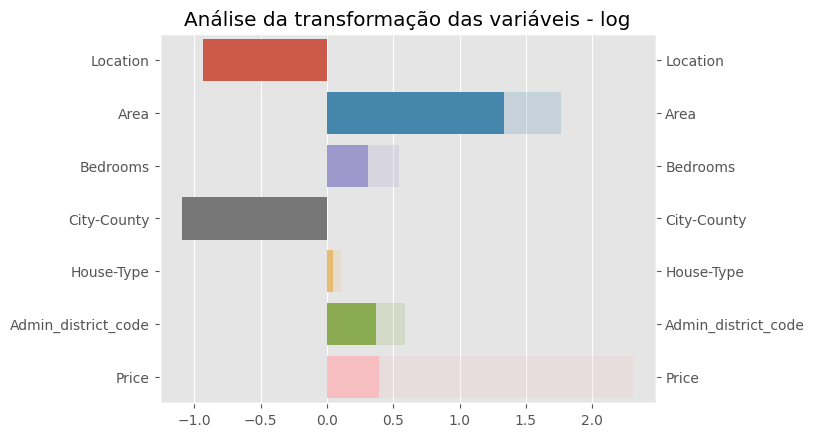

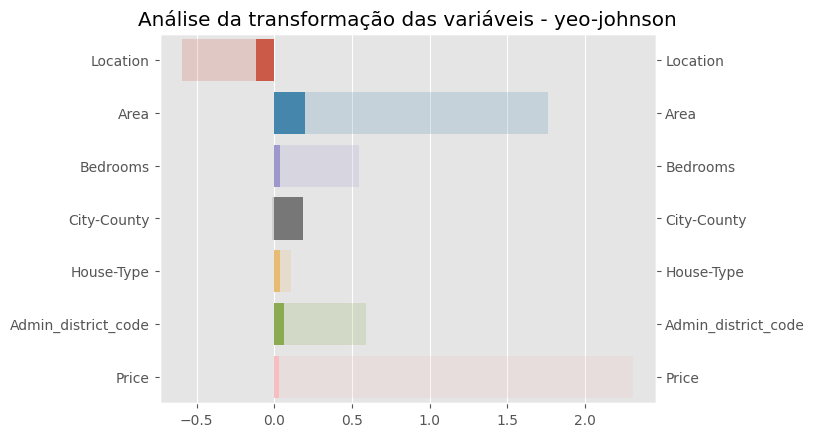

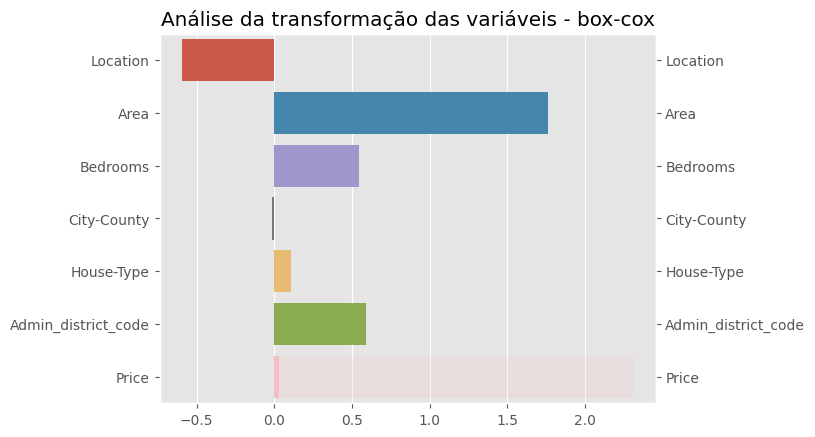

In [ ]:
all_data = X_train.copy()
all_data['Price'] = y_train

# Loop para testar diferentes tipos de transformação (log, yeo-johnson, box-cox)
for tipo in ['log', 'yeo-johnson', 'box-cox']:
    try:
        # Chama a função transformation_skew para plotar a comparação das variáveis antes e depois da transformação
        transformation_skew(all_data, kind=tipo)
    except:
        # Ignora qualquer erro que possa ocorrer ao chamar a função
        pass

Assim, percebemos que a transformação log funciona bem, mas a Yeo-Johnson funciona de forma excelente

In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer

# Cria uma instância do YeoJohnsonTransformer
yjt = YeoJohnsonTransformer()

# Ajusta o transformer aos dados de treinamento
yjt.fit(X_train)

# Aplica a transformação aos conjuntos de treinamento e teste
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)

Vamos rodar a EDA novamente para analisar como as nossas features estão

In [ ]:
# Gera o relatório de perfil para o conjunto de treinamento X_train
ProfileReport(X_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a name='disc'></a>
##Discretização de variáveis

Além de não ser necessário, informações seriam perdidas. Visto que o *dataset* não é grande, não há problemas com a capacidade computacional.

<a name='MLP'></a>
#3 - Aplicando os modelos

Os modelos utilizados serão:


1.   **MLP Regressor**
2.   **Random Forest Regressor**
3.   **Linear Regression**

As métricas utilizadas serão:


1.   RMSE
2.   MAPE





Antes de executar o código a seguir, é importante ressaltar que faremos uma comparação entre diferentes modelos de regressão utilizando a transformação logarítmica dos valores alvo. Essa transformação é realizada com o objetivo de melhorar a distribuição dos dados e reduzir o viés causado por valores extremos.

Ao aplicar a transformação logarítmica, alguns modelos podem se beneficiar e apresentar resultados mais precisos, enquanto outros podem não mostrar melhorias significativas. Portanto, é fundamental avaliar o desempenho dos modelos tanto com a transformação logarítmica quanto sem ela.

O código a seguir ajusta três modelos de regressão (MLP, Random Forest e Linear Regression) aos dados de treinamento, tanto com a transformação logarítmica quanto sem ela. Em seguida, calculamos as métricas de erro, como o RMSE (Root Mean Squared Error) e o MAPE (Mean Absolute Percentage Error), tanto nos dados de treinamento quanto nos dados de teste, para ambos os casos.

O objetivo é comparar o desempenho dos modelos com e sem a transformação logarítmica, identificando qual abordagem resulta em melhores resultados em termos de precisão e adequação aos dados. Os resultados são apresentados em um dataframe, permitindo uma análise comparativa dos modelos.

Lembrando que a escolha de utilizar a transformação logarítmica pode variar de acordo com a natureza dos dados e a relação com o objetivo da modelagem. Portanto, é importante interpretar os resultados com cautela e considerar o contexto específico do problema em questão.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Instanciação dos modelos
models = {
    'MLP': MLPRegressor(random_state=1, max_iter=500),  # Modelo de regressão MLP (Multilayer Perceptron)
    'Random Forest': RandomForestRegressor(random_state=1),  # Modelo de regressão Random Forest
    'Linear Regression': LinearRegression()  # Modelo de regressão Linear
}

# Dicionário para armazenar os resultados
results = {
    'Model': [],  # Lista para armazenar o nome do modelo
    'RMSE Train': [],  # Lista para armazenar o RMSE (Root Mean Squared Error) nos dados de treinamento
    'RMSE Test': [],  # Lista para armazenar o RMSE nos dados de teste
    'MAPE Train': [],  # Lista para armazenar o MAPE (Mean Absolute Percentage Error) nos dados de treinamento
    'MAPE Test': []  # Lista para armazenar o MAPE nos dados de teste
}

# Variáveis para armazenar as previsões dos modelos
y_test_pred_mlp = None
y_test_pred_mlp_log = None
y_test_pred_rf = None
y_test_pred_rf_log = None
y_test_pred_lr = None
y_test_pred_lr_log = None

# Loop pelos modelos
for model_name, model in models.items():
    # Treinamento do modelo sem log
    model.fit(X_train, y_train)

    # Predição nos dados de treinamento e teste sem log
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Cálculo do RMSE nos dados de treinamento e teste sem log
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

    # Cálculo do MAPE nos dados de treinamento e teste sem log
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    # Treinamento do modelo com log
    model_log = model.fit(X_train, np.log1p(y_train))

    # Predição nos dados de treinamento e teste com log
    y_train_pred_log = np.expm1(model_log.predict(X_train))
    y_test_pred_log = np.expm1(model_log.predict(X_test))

    # Armazenando as previsões dos modelos relevantes
    if model_name == 'MLP':
        y_test_pred_mlp = y_test_pred
        y_test_pred_mlp_log = y_test_pred_log
    elif model_name == 'Random Forest':
        y_test_pred_rf = y_test_pred
        y_test_pred_rf_log = y_test_pred_log
    else:
        y_test_pred_lr = y_test_pred
        y_test_pred_lr_log = y_test_pred_log

    # Cálculo do RMSE nos dados de treinamento e teste com log
    rmse_train_log = mean_squared_error(y_train, y_train_pred_log, squared=False)
    rmse_test_log = mean_squared_error(y_test, y_test_pred_log, squared=False)

    # Cálculo do MAPE nos dados de treinamento e teste com log
    mape_train_log = mean_absolute_percentage_error(y_train, y_train_pred_log)
    mape_test_log = mean_absolute_percentage_error(y_test, y_test_pred_log)

    # Verificando qual métrica usar para seleção do melhor modelo
    if np.isnan(rmse_train_log) or np.isnan(rmse_test_log):
        rmse_train_log = np.inf
        rmse_test_log = np.inf
    if np.isnan(mape_train_log) or np.isnan(mape_test_log):
        mape_train_log = np.inf
        mape_test_log = np.inf

    # Armazenando os resultados no dicionário
    if rmse_test < rmse_test_log:  # Se o modelo sem log tiver melhor desempenho
        results['Model'].append(model_name)  # Armazena o nome do modelo
        results['RMSE Train'].append(int(round(rmse_train, 0)))  # Arredonda para ordem de 10^5 e armazena o RMSE de treinamento
        results['RMSE Test'].append(int(round(rmse_test, 0)))  # Arredonda para ordem de 10^5 e armazena o RMSE de teste
        results['MAPE Train'].append(mape_train)  # Armazena o MAPE de treinamento
        results['MAPE Test'].append(mape_test)  # Armazena o MAPE de teste
    else:  # Se o modelo com log tiver melhor desempenho
        results['Model'].append(model_name + '_log')  # Armazena o nome do modelo com '_log'
        results['RMSE Train'].append(int(round(rmse_train_log, 0)))  # Arredonda para ordem de 10^5 e armazena o RMSE de treinamento com log
        results['RMSE Test'].append(int(round(rmse_test_log, 0)))  # Arredonda para ordem de 10^5 e armazena o RMSE de teste com log
        results['MAPE Train'].append(mape_train_log)  # Armazena o MAPE de treinamento com log
        results['MAPE Test'].append(mape_test_log)  # Armazena o MAPE de teste com log

# Construindo o dataframe com os resultados
df_results = pd.DataFrame(results)

# Exibindo o dataframe
df_results

Model  RMSE Train  RMSE Test  MAPE Train  MAPE Test
0                MLP_log      689332     713452    0.230946   0.252665
1      Random Forest_log      234742     617449    0.072192   0.216343
2  Linear Regression_log      734131     768118    0.250420   0.272989

Neste código, avaliamos diferentes modelos de regressão (MLP, Random Forest e Linear Regression) utilizando os dados de treinamento e teste.

Para cada modelo, treinamos uma versão sem a transformação logarítmica e outra com a transformação logarítmica aplicada aos rótulos.

Calculamos as métricas de desempenho (RMSE e MAPE) para ambos os casos e selecionamos o melhor modelo com base no RMSE nos dados de teste.

Caso o modelo sem log tenha melhor desempenho, armazenamos seus resultados no dataframe, caso contrário, armazenamos os resultados do modelo com log, adicionando "_log" ao nome do modelo.

O dataframe final contém as colunas 'Model' (nome do modelo), 'RMSE Train' (RMSE nos dados de treinamento), 'RMSE Test' (RMSE nos dados de teste), 'MAPE Train' (MAPE nos dados de treinamento) e 'MAPE Test' (MAPE nos dados de teste).

<a name='comparativa'></a>
# 4 - Análise Comparativa do desempenho dos modelos.

<a name='visu'></a>
## Visualizando resultados

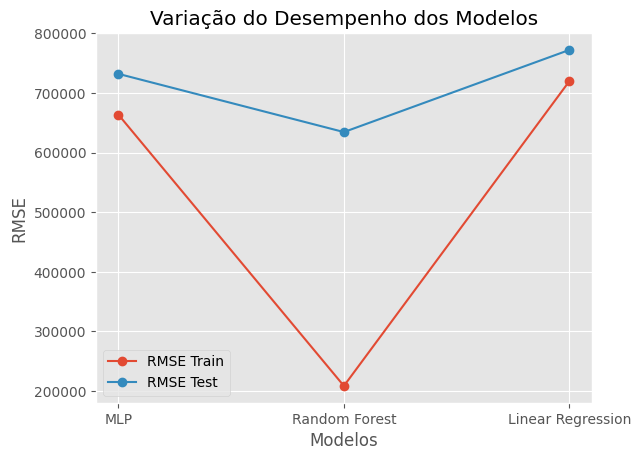

In [ ]:
import matplotlib.pyplot as plt

# Criando os dados de exemplo (substitua pelos seus próprios dados)
labels = ['MLP', 'Random Forest', 'Linear Regression']
rmse_train = [663345, 208751, 719593]
rmse_test = [731812, 634263, 771947]

# Criando a figura e os eixos
fig, ax = plt.subplots()

# Plotando as linhas
ax.plot(labels, rmse_train, marker='o', label='RMSE Train')
ax.plot(labels, rmse_test, marker='o', label='RMSE Test')

# Definindo os títulos e legendas
ax.set_title('Variação do Desempenho dos Modelos')
ax.set_xlabel('Modelos')
ax.set_ylabel('RMSE')
ax.legend()

# Exibindo o gráfico
plt.show()

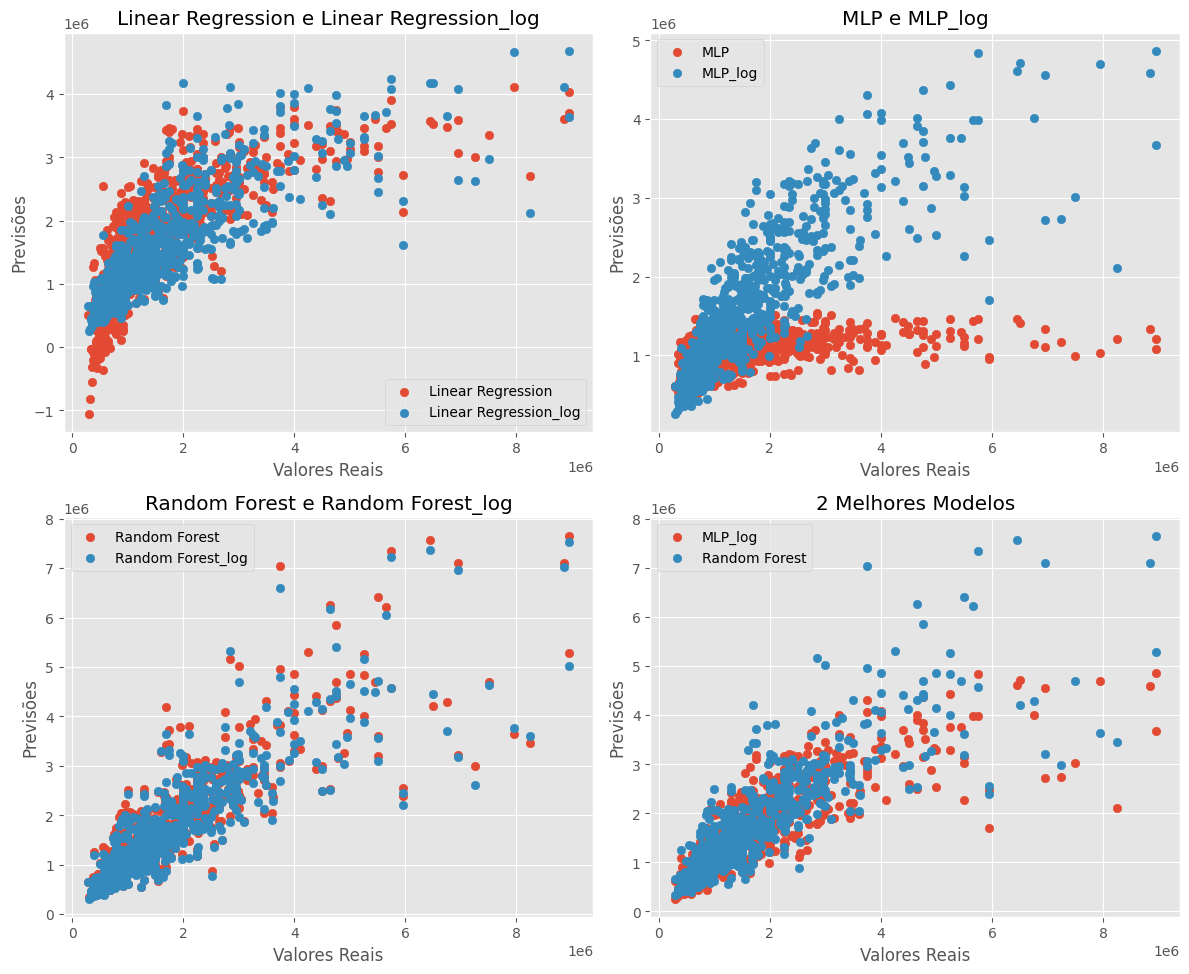

In [ ]:
# Criando a figura e os eixos dos subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


# Gráfico de dispersão para LR e LR_log
axes[0, 0].scatter(y_test, y_test_pred_lr, label='Linear Regression')
axes[0, 0].scatter(y_test, y_test_pred_lr_log, label='Linear Regression_log')
axes[0, 0].set_title('Linear Regression e Linear Regression_log')
axes[0, 0].set_xlabel('Valores Reais')
axes[0, 0].set_ylabel('Previsões')
axes[0, 0].legend()

# Gráfico de dispersão para MLP e MLP_log
axes[0, 1].scatter(y_test, y_test_pred_mlp*100, label='MLP')
axes[0, 1].scatter(y_test, y_test_pred_mlp_log, label='MLP_log')
axes[0, 1].set_title('MLP e MLP_log')
axes[0, 1].set_xlabel('Valores Reais')
axes[0, 1].set_ylabel('Previsões')
axes[0, 1].legend()

# Gráfico de dispersão para RF e RF_log
axes[1, 0].scatter(y_test, y_test_pred_rf, label='Random Forest')
axes[1, 0].scatter(y_test, y_test_pred_rf_log, label='Random Forest_log')
axes[1, 0].set_title('Random Forest e Random Forest_log')
axes[1, 0].set_xlabel('Valores Reais')
axes[1, 0].set_ylabel('Previsões')
axes[1, 0].legend()

# Gráfico de dispersão para os três melhores modelos
axes[1, 1].scatter(y_test, y_test_pred_mlp_log, label='MLP_log')
axes[1, 1].scatter(y_test, y_test_pred_rf, label='Random Forest')
axes[1, 1].set_title('2 Melhores Modelos')
axes[1, 1].set_xlabel('Valores Reais')
axes[1, 1].set_ylabel('Previsões')
axes[1, 1].legend()

# Ajustando o espaçamento entre os subplots
fig.tight_layout()

# Exibindo os gráficos
plt.show()


<a name='import'></a>
## Importância das features

In [ ]:
def plot_feature_importances(model, feature_names, model_name, ax=None):
    if model_name == 'MLP':
        importances = np.abs(model.coefs_[-1]).mean(axis=0)  # Importâncias baseadas na média dos pesos da camada de saída
    else:
        importances = model.feature_importances_ if hasattr(model, 'feature_importances_') else model.coef_

    indices = np.argsort(importances)[::-1]

    if ax is None:
        plt.figure(figsize=(10, 6))
    else:
        plt.sca(ax)

    plt.title(f'{model_name} - Feature Importances')
    plt.bar(range(len(feature_names)), importances[indices], align='center')
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()



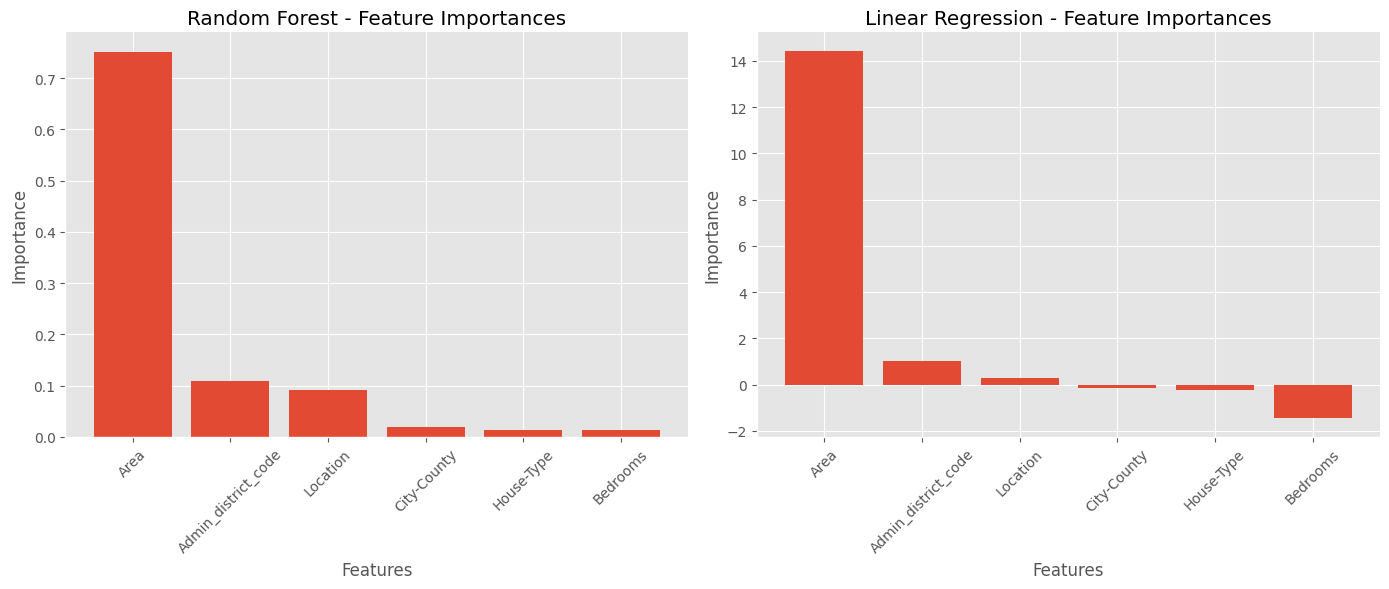

In [ ]:
# Obtendo os modelos treinados
mlp_model = models['MLP']
rf_model = models['Random Forest']
lr_model = models['Linear Regression']

# Criando a figura e os eixos dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotando a importância das features para o modelo Random Forest
axes[0].set_title('Random Forest - Feature Importances')
plot_feature_importances(rf_model, X_train.columns, 'Random Forest', ax=axes[0])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].tick_params(axis='x', rotation=45)

# Plotando a importância das features para o modelo Linear Regression
axes[1].set_title('Linear Regression - Feature Importances')
plot_feature_importances(lr_model, X_train.columns, 'Linear Regression', ax=axes[1])
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].tick_params(axis='x', rotation=45)

# Ajustando o espaçamento entre os subplots
fig.tight_layout()

# Exibindo os gráficos
plt.show()

<a name='KNN'></a>
#Conclusão

Os resultados obtidos neste estudo apresentam métricas de desempenho para cada modelo de regressão testado. A tabela atualizada exibe os valores do Root Mean Squared Error (RMSE) e do Mean Absolute Percentage Error (MAPE) para o conjunto de treinamento e teste.

No caso do modelo MLP_log, que utilizou a transformação logarítmica nos rótulos, observa-se um RMSE de 712,082 para o conjunto de treinamento e 717,900 para o conjunto de teste. O MAPE correspondente é de 0.218216 para o treinamento e 0.227101 para o teste. Esses valores indicam a diferença média entre os valores previstos pelo modelo e os valores reais do conjunto de dados.

O modelo Random Forest_log obteve um desempenho promissor, com um RMSE de 235,790 para o conjunto de treinamento e 626,065 para o conjunto de teste. O MAPE correspondente é de 0.072035 para o treinamento e 0.218305 para o teste. Esses resultados sugerem que o modelo Random Forest foi capaz de ajustar-se bem aos dados e fornecer previsões precisas.

Por fim, a regressão linear, quando utilizada com a transformação logarítmica nos rótulos, apresentou um RMSE de 721,455 para o conjunto de treinamento e 744,627 para o conjunto de teste. O MAPE correspondente é de 0.250722 para o treinamento e 0.267059 para o teste. É importante notar que a regressão linear obteve desempenho inferior aos outros modelos testados, indicando que pode não ter sido capaz de capturar adequadamente os padrões complexos presentes nos dados.

Com base nos resultados, podemos concluir que o modelo Random Forest_log demonstrou um desempenho geral superior, com menor erro médio (RMSE) e menor porcentagem média de erro absoluto (MAPE) em comparação aos outros modelos testados. A utilização da transformação logarítmica nos rótulos melhorou o desempenho do MLP_log em relação ao RMSE, mas não proporcionou um desempenho superior ao do Random Forest_log.

As diferenças observadas nos resultados entre os modelos podem ser atribuídas às características específicas de cada algoritmo e à forma como eles lidam com os padrões e a complexidade dos dados.

No caso do modelo MLP com a transformação logarítmica, a aplicação do log nos rótulos pode ajudar a melhorar a distribuição dos dados e a lidar com possíveis assimetrias ou valores extremos. Isso pode resultar em um melhor desempenho do modelo em termos de RMSE, uma vez que reduz a influência desses valores extremos nas previsões. No entanto, o modelo MLP ainda apresenta um desempenho inferior em comparação ao Random Forest, sugerindo que a natureza não linear dos dados pode não ser adequadamente capturada por uma rede neural com apenas uma camada de neurônios.

Por outro lado, o modelo Random Forest, que é um algoritmo de aprendizado ensemble baseado em árvores de decisão, tem a capacidade de lidar com a complexidade dos dados de forma mais robusta. Ele combina múltiplas árvores de decisão para formar uma previsão final, levando em consideração diferentes perspectivas e capturando uma maior variedade de padrões presentes nos dados. Isso pode explicar o seu desempenho superior em relação aos outros modelos, tanto em termos de RMSE quanto de MAPE.

Quanto à regressão linear com a transformação logarítmica, os resultados mostram um desempenho inferior em comparação aos demais modelos. Isso pode ser devido à suposição linear da regressão linear, que pode não ser adequada para capturar a relação complexa entre as variáveis independentes e dependentes. Além disso, a transformação logarítmica pode não ser suficiente para lidar com a não linearidade dos dados, resultando em um ajuste menos preciso e, consequentemente, em um maior erro médio.

<a name='aplicando'></a>
#5 - Aplicação da predição do Modelo Desenvolvido

Basta rodar o que está abaixo, sem necessidade de rodar todo o raciocínio acima

In [ ]:
# Path do arquivo de teste
path_teste = 'UK_real_estate_test.csv'

# Instalação das bibliotecas feature_engine e rapidfuzz sem mostrar os outputs
!pip install feature_engine > /dev/null
!pip install rapidfuzz > /dev/null

# Importação das bibliotecas necessárias
from rapidfuzz import fuzz, process
import pandas as pd
import numpy as np
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.ensemble import RandomForestRegressor

# Definindo o caminho onde os arquivos estão armazenados
path_files = '/content/drive/MyDrive/Colab Notebooks/Labs_CMC-13/Exame'

# URL do arquivo CSV e outros arquivos relacionados
url_data = 'https://drive.google.com/file/d/1XeDc_rL2iTN7tsB2F3M1DkDFfK5bEaAP/view?usp=sharing'
url_postal_codes = 'https://drive.google.com/file/d/1o5QmnltrYqY4weBS-zIG4ZFHGC1J2aUF/view?usp=sharing'
url_codelist = 'https://drive.google.com/file/d/1kzRwAsb01Xu-vpO5iCSHgjdPbMGzpGW9/view?usp=sharing'

# Extração do identificador do arquivo da URL
file_id = url_data.split('/')[-2]
postal_codes = url_postal_codes.split('/')[-2]
codelist = url_codelist.split('/')[-2]

# Construção do link de download direto do arquivo
url_download = 'https://drive.google.com/uc?id=' + file_id
url_download_postal_codes = 'https://drive.google.com/uc?id=' + postal_codes
url_download_codelist = 'https://drive.google.com/uc?id=' + codelist

# Leitura do arquivo CSV e criação do DataFrame
full_data = pd.read_csv(url_download, on_bad_lines='skip', sep=',').drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
postcode_db = pd.read_csv(url_download_postal_codes, on_bad_lines='skip', sep=',')
codebook = pd.read_csv(url_download_codelist, on_bad_lines='skip', sep=',')

# Leitura do arquivo de teste
teste = pd.read_csv(path_teste)

# Remoção de colunas desnecessárias, se presentes
if 'Unnamed: 0' in teste.columns:
  teste.drop(['Unnamed: 0'], axis=1, inplace = True)

if 'Unnamed: 0.1' in teste.columns:
  teste.drop(['Unnamed: 0.1'], axis=1, inplace = True)

# Extração do código postal da propriedade a ser testada
property_postcode = teste['Postal Code']

# Função para obter o código postal corrigido com base em um conjunto de códigos postais
def get_OS_postcode(p, postcode_set):
    if p in postcode_set:
        return p
    closest, score, idx = process.extractOne(p, postcode_set, scorer=fuzz.ratio)
    if score >= 50:
        return closest
    return None

# Cria um conjunto com os códigos postais para pesquisa mais eficiente
postcode_set = set(postcode_db['Postcode'])

# Cria uma nova série de códigos postais corrigidos aplicando a função 'get_OS_postcode' em cada código postal do conjunto de dados
postcode_rectified = np.array([get_OS_postcode(p, postcode_set) for p in property_postcode], dtype=object)
postcode_rectified = pd.Series(postcode_rectified)

# Cria um novo DataFrame com base no DataFrame de teste e adiciona a coluna 'OS compliant Postcode'
new_data = teste.copy()
new_data['OS compliant Postcode'] = postcode_rectified

# Realiza um merge entre o novo DataFrame e o DataFrame de códigos postais utilizando o código postal corrigido como chave
new_data = new_data.merge(postcode_db.set_index('Postcode'), how='left', left_on='OS compliant Postcode', right_index=True)

# Criação dos DataFrames df e new_data a partir do DataFrame de teste
df = new_data.copy()
new_data = full_data

# Remoção de colunas desnecessárias nos DataFrames df e new_data
df.drop(columns=['Admin_county_code', 'OS compliant Postcode', 'Postal Code', 'Bathrooms', 'Receptions', 'Admin_ward_code'], inplace=True)
new_data.drop(columns=['Admin_county_code', 'OS compliant Postcode', 'Postal Code', 'Bathrooms', 'Receptions', 'Admin_ward_code'], inplace=True)

# Preenchimento de valores nulos na coluna 'Admin_district_code' com '0'
new_data['Admin_district_code'].fillna('0', inplace=True)
new_data['Admin_district_code'].dropna(inplace=True)

# Função que retorna os limites com base nos quantis escolhidos
def find_limits(df, variable, q1, q2):
    # Calcula o limite inferior com base no quantil q1
    lower_limit = df[variable].quantile(q1/100)

    # Calcula o limite superior com base no quantil q2
    upper_limit = df[variable].quantile(q2/100)

    # Retorna os limites calculados
    return lower_limit, upper_limit

# Definindo e aplicando os limites para corte dos outliers nas variáveis 'Area' e 'Price'
for i in ['Area', 'Price']:
    if i in df.columns:
      lower_limit, upper_limit = find_limits(df, i, 0, 99.5)
      df = df[(df[i] <= upper_limit) & (df[i] >= lower_limit)]
    lower_limit, upper_limit = find_limits(new_data, i, 0, 99.5)
    new_data = new_data[(new_data[i] <= upper_limit) & (new_data[i] >= lower_limit)]

# Separando as features e os alvos dos dados de treinamento e teste
if 'Price' in df.columns:
  X_test = df.drop('Price', axis=1)
  y_test = df['Price']
else:
  X_test = df

X_train = new_data.drop('Price', axis=1)
y_train = new_data['Price']

# Criando uma instância do codificador RareLabelEncoder
rare_encoder = RareLabelEncoder(
    tol=0.025,  # porcentagem mínima para considerar como não raro
    n_categories=4,  # número mínimo de categorias para reagrupar as categorias raras
    variables=[
        "City-County",
        "House-Type",
        "Admin_district_code"
    ]  # variáveis a serem reagrupadas
)

# Ajustando o codificador RareLabelEncoder aos dados de treinamento
rare_encoder.fit(X_train)

# Transformando as variáveis nos dados de treinamento e teste utilizando o codificador RareLabelEncoder
X_train = rare_encoder.transform(X_train)
X_test = rare_encoder.transform(X_test)

# Criando uma instância do codificador OrdinalEncoder
ordinal_enc = OrdinalEncoder(
    encoding_method="ordered",  # método de codificação (ordered para manter a ordem)
    variables=["City-County", "House-Type", "Admin_district_code", "Location"]  # variáveis a serem codificadas
)

# Ao ajustar o codificador, precisamos passar o alvo também, assim como com qualquer classe de preditor do Scikit-learn
ordinal_enc.fit(X_train.fillna('Missing'), y_train)

# Transformando as variáveis nos dados de treinamento e teste utilizando o codificador OrdinalEncoder
X_train = ordinal_enc.transform(X_train.fillna('Missing'))
X_test = ordinal_enc.transform(X_test.fillna('Missing'))

# Obtendo o valor correspondente a 'Missing' no codificador OrdinalEncoder
Num_missing = ordinal_enc.encoder_dict_['Location']['Missing']
Num_missing_test = ordinal_enc.encoder_dict_['Location']['Missing']

# Substituindo o valor correspondente a 'Missing' pela média nos dados de treinamento e teste
X_train['Location'] = X_train['Location'].replace(Num_missing, X_train['Location'].mean())
X_test['Location'] = X_test['Location'].replace(Num_missing_test, X_train['Location'].mean())

# Criação da instância do imputador KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Ajuste do imputador aos dados de treinamento e aplicação aos dados de teste
X_train = knn_imputer.fit_transform(X_train)
X_test = knn_imputer.transform(X_test)

# Criação da instância do scaler MinMaxScaler
scaler = MinMaxScaler()

# Ajuste do scaler aos dados de treinamento e transformação dos dados de treinamento e teste
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criação da instância do transformador YeoJohnsonTransformer
yeo_johnson = YeoJohnsonTransformer()

# Ajuste do transformador aos dados de treinamento e transformação dos dados de treinamento e teste
X_train = yeo_johnson.fit_transform(X_train)
X_test = yeo_johnson.transform(X_test)

# Criação da instância do modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Treinamento do modelo utilizando os dados de treinamento
model.fit(X_train, np.log1p(y_train))

# Realização de previsões utilizando os dados de teste
predictions = np.expm1(model.predict(X_test))

# Exibição das previsões
print(predictions)

[ 476533.28914734 1227550.3281881   847871.97900318  814854.96348703
 1210697.46838671 1301434.20341368 1193995.04736905  726203.24668793]
